In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [248]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [249]:
df.shape

(13320, 9)

In [250]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [251]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [252]:
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [253]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [254]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [255]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [256]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-256-eadc3504d97e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [257]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [258]:
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [259]:
df2.bhk.value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bhk, dtype: int64

In [260]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [261]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [262]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [263]:
def convert_sqt_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        mean = ((float(tokens[0])+float(tokens[1])/2))
        return float(mean)
    try:
        return float(x)
    except:
        return None
        

In [264]:
df4 = df2.copy()


In [265]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqt_to_num)

In [266]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [267]:
df4[~df4['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk


In [268]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       3525.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [269]:
df5 = df4.copy()

In [270]:
df5['price/sqft'] = ((df5.price)*100000/(df5.total_sqft))
df5.head()

,location,size,total_sqft,bath,price,bhk,price/sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [271]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [272]:
df5.location.value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

In [273]:
df5.location = df5.location.apply(lambda x: x.strip())

In [274]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [275]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [276]:
location_stats[location_stats <= 10]

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [277]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [278]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - At

In [279]:
df5.location.value_counts()

other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [280]:
df5.shape

(13246, 7)

In [281]:
df5[(df5['total_sqft'] / df5['bhk']) < 300]

,location,size,total_sqft,bath,price,bhk,price/sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [282]:
df6 = df5[~((df5['total_sqft'] / df5['bhk']) < 300)]
df6.shape

(12502, 7)

In [283]:
df6['price/sqft'].describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price/sqft, dtype: float64

In [284]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price/sqft'])
        std = np.std(subdf['price/sqft'])
        reduced_df = subdf[(subdf['price/sqft'] > (m -std)) & (subdf['price/sqft'] <= (m +std))]
        df_out = pd.concat([df_out, reduced_df])
    return df_out

In [285]:
df7 = remove_pps_outliers(df6)
df7

,location,size,total_sqft,bath,price,bhk,price/sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
13285,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [286]:
def plot_scatter(df,location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] ==2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] ==3)]
    plt.figure(figsize=(10,7))
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue', label= '2 BHK')
    plt.scatter(bhk3['total_sqft'], bhk3['price'], color='red', label= '3 BHK')
    plt.title(location)
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.legend()


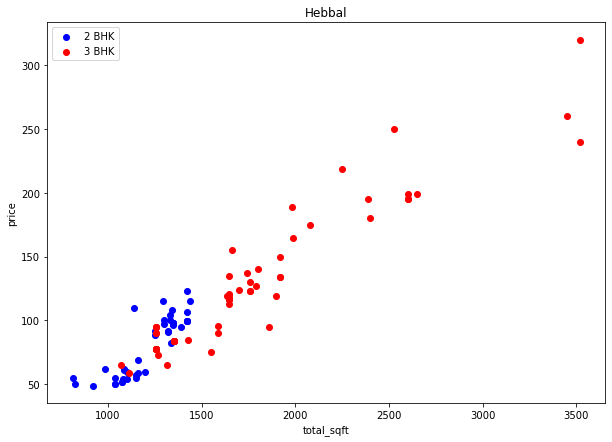

In [287]:
plot_scatter(df7, 'Hebbal')

In [288]:
def remove_outliers(df):
     
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df['price/sqft']), 
                'std' : np.std(bhk_df['price/sqft']),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price/sqft'] < (stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis='index')
        
df8 = remove_outliers(df7)
df8.shape
    

(7326, 7)

In [289]:
remove_outliers(df7)

,location,size,total_sqft,bath,price,bhk,price/sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
13238,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
13245,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
13285,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
13291,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


Text(0, 0.5, 'count')

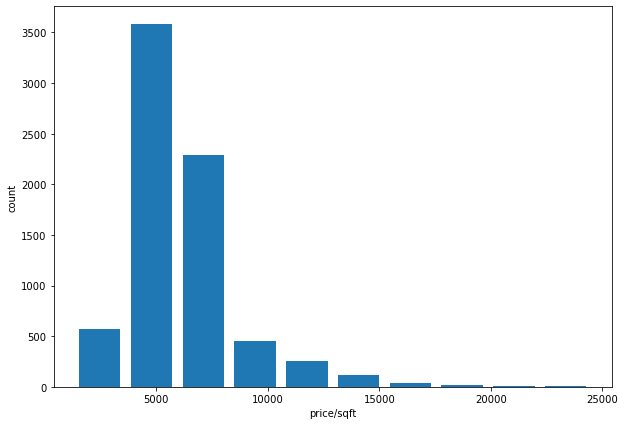

In [290]:
plt.figure(figsize=(10,7))
plt.hist(df8['price/sqft'], rwidth=0.8)
plt.xlabel('price/sqft')
plt.ylabel('count')

In [291]:
df9 = df8[(df8['bath'] <= df8['bhk']+2)]
df9

,location,size,total_sqft,bath,price,bhk,price/sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
13238,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
13245,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
13285,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
13291,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [292]:
df10 = df9.drop(['size', 'price/sqft'], axis='columns')
df10

,location,total_sqft,bath,price,bhk
210,1st Block Jayanagar,2850.0,4.0,428.0,4
848,1st Block Jayanagar,1630.0,3.0,194.0,3
2152,1st Block Jayanagar,1875.0,2.0,235.0,3
7138,1st Block Jayanagar,1200.0,2.0,130.0,3
7358,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
13238,other,1200.0,2.0,70.0,2
13245,other,1800.0,1.0,200.0,1
13285,other,1353.0,2.0,110.0,2
13291,other,812.0,1.0,26.0,1


In [293]:
df10 = pd.get_dummies(df10, drop_first=True)
df10

,total_sqft,bath,price,bhk,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
210,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,130.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,148.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13238,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13245,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13285,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13291,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [294]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [295]:
from sklearn.preprocessing import StandardScaler

In [296]:
x = df10.drop('price', axis='columns')
y = df10.price

In [297]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [298]:
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.858669911106728

In [299]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.8335117 , 0.83957346, 0.86465991, 0.79609017, 0.8089463 ])

In [300]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [310]:
model_params = {
    
    
   
    
   
    
    'linear_regression': {
        'model': LinearRegression(), 
        'params': {
            
            
        }
    },
    
   
    
    'lasso': {
        'model': Lasso(), 
        'params': {
            'alpha': [1, 2],
            'selection': ['random', 'cyclic'],
        }
    },
    
    'decision_tree': {
        'model': DecisionTreeRegressor(), 
        'params': {
            'criterion': ['squared_error', 'friedman_mse'],
            'splitter' : ['best', 'random']
        }
    },
}

In [311]:
scores=[]
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    gs = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    gs.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })
    


In [312]:
df_scores = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df_scores

,model,best_score,best_params
0,linear_regression,0.828556,{}
1,lasso,0.693472,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.713590,"{'criterion': 'squared_error', 'splitter': 'ra..."


In [319]:
def predict_price ( location, sqft,bath, bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    a = np.zeros(len(x.columns))
    a[0] = sqft
    a[1] = bath
    a[2] = bhk
    if loc_index <= 0:
        a[loc_index] = 1
    
    return lr_clf.predict([a])[0]

In [320]:
predict_price('location_5th Block Hbr Layout', 1000,2, 2)

C:\Users\Windows 10\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


201.4030762689253

In [321]:
predict_price('location_5th Block Hbr Layout', 1000,3, 3)

C:\Users\Windows 10\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


205.03726873791075

In [324]:
predict_price('location_Yelahanka', 1000,2, 2)

C:\Users\Windows 10\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


201.4030762689253

In [325]:
import pickle

In [326]:
with open ('bangalore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)
    

In [329]:
import json

columns = {
    'data_columns': [col.lower() for col in x.columns]
}

with open ('columns.json', 'w') as f:
    f.write(json.dumps(columns))